In [19]:
import cv2
import os

# Create a folder for frames
output_folder = "/Users/gergoar/Documents/Ger Goar/Maestría BCN/BSE/Term 2/Deep Learning/Final Project/video_frames"  # Change to your preferred path
os.makedirs(output_folder, exist_ok=True)

# Load video
video_path = "/Users/gergoar/Documents/Ger Goar/Maestría BCN/BSE/Term 2/Deep Learning/Final Project/Videos/Oliver/video_oliver.mov"  # Change this to your actual video path
cap = cv2.VideoCapture(video_path)

frame_rate = 1  # Extract 1 frame every 1 frames (adjust as needed)
frame_count = 0
saved_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    if frame_count % frame_rate == 0:  # Save every nth frame
        cv2.imwrite(f"video_frames/frame_{saved_count}.jpg", frame)
        saved_count += 1
    frame_count += 1

cap.release()
print(f"✅ Extracted {saved_count} frames from video!")

import cv2
import matplotlib.pyplot as plt

frame_path = "video_frames/frame_0.jpg"  # Change if needed

img = cv2.imread(frame_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")
plt.show()

✅ Extracted 1214 frames from video!


In [21]:
import cv2
import os

frames_folder = "video_frames"  # Folder with extracted frames

# Rotate and overwrite each image
for filename in os.listdir(frames_folder):
    img_path = os.path.join(frames_folder, filename)

    # Read image
    img = cv2.imread(img_path)

    if img is not None:
        # Rotate 90 degrees clockwise
        img_rotated = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

        # Overwrite the original image
        cv2.imwrite(img_path, img_rotated)

print(f"All images in '{frames_folder}' have been rotated and replaced.")

import cv2
import matplotlib.pyplot as plt

frame_path = "video_frames/frame_0.jpg"  # Change if needed

img = cv2.imread(frame_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")
plt.show()


All images in 'video_frames' have been rotated and replaced.


✅ All images resized to (128, 128) and saved in 'video_frames'.


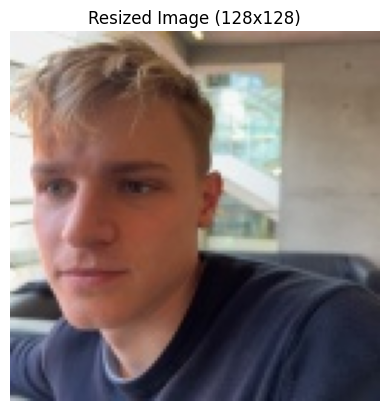

In [23]:
import cv2
import os

frames_folder = "video_frames"  # Path to extracted images
target_size = (128, 128)  # Resize target

# Resize and overwrite images
for filename in os.listdir(frames_folder):
    img_path = os.path.join(frames_folder, filename)

    # Read image
    img = cv2.imread(img_path)

    if img is not None:
        # Resize image
        img_resized = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)

        # Overwrite original image
        cv2.imwrite(img_path, img_resized)

print(f"✅ All images resized to {target_size} and saved in '{frames_folder}'.")


import matplotlib.pyplot as plt
import cv2

sample_img = "video_frames/frame_0.jpg"  # Change if needed
img = cv2.imread(sample_img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")
plt.title("Resized Image (128x128)")
plt.show()


In [24]:
import cv2
import os

# Paths for video and output folders
videos_folder = "/Users/gergoar/Documents/Ger Goar/Maestría BCN/BSE/Term 2/Deep Learning/Final Project/Videos"
output_folder = "/Users/gergoar/Documents/Ger Goar/Maestría BCN/BSE/Term 2/Deep Learning/Final Project/Data Set"

# Define frame extraction parameters
frame_rate = 1  # Extract 1 frame every 1 frame
target_size = (128, 128)  # Resize target (128x128)

# Loop through each person (folder: Ger, Timo, Oliver)
for person in ["Ger", "Timo", "Oliver"]:
    person_video_folder = os.path.join(videos_folder, person)
    person_output_folder = os.path.join(output_folder, person)
    
    # Create output folder if it doesn't exist
    os.makedirs(person_output_folder, exist_ok=True)

    # Loop through all video files for this person
    for video_file in os.listdir(person_video_folder):
        if video_file.endswith(".mov") or video_file.endswith(".mp4"):
            video_path = os.path.join(person_video_folder, video_file)
            cap = cv2.VideoCapture(video_path)

            frame_count = 0
            saved_count = 0

            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break

                # Rotate the image 90 degrees clockwise
                frame_rotated = cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)

                # Resize the frame to 128x128
                frame_resized = cv2.resize(frame_rotated, target_size, interpolation=cv2.INTER_AREA)

                # Save the frame as a JPEG image with a unique filename
                if frame_count % frame_rate == 0:  # Save every nth frame
                    # Add the video name to the filename to avoid overwriting
                    frame_filename = f"{video_file[:-4]}_frame_{saved_count}.jpg"  # Remove .mov or .mp4 extension
                    frame_filepath = os.path.join(person_output_folder, frame_filename)
                    cv2.imwrite(frame_filepath, frame_resized)
                    saved_count += 1

                frame_count += 1

            cap.release()
            print(f"✅ Extracted {saved_count} frames from video '{video_file}' for {person}.")

print("All frames have been extracted, rotated, resized, and saved!")


✅ Extracted 1338 frames from video 'video_ger.mov' for Ger.
✅ Extracted 1214 frames from video 'video_oliver.mov' for Oliver.
All frames have been extracted, rotated, resized, and saved!
